<a href="https://colab.research.google.com/github/Madhav2204/Digital-Image-Processing-and-Pattern-Rcognition-/blob/main/p3_Edge_Detection_and_Hough_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment-03**

### **What is Edge Detection?**
Typically, the first step in the process is to perform some form of edge detection on the image, and to generate a new Binary edge image that provides the necessary segmentation of the original image.

Edge detection algorithms operate on the premise that each pixel in a grayscale digital image has a first derivative, with regard to the change in intensity at that point, if a significant change occurs at a given pixel in the image, then a white pixel is placed in the binary image, otherwise, a black pixel is placed there instead.

In general, the gradient is calculated for each pixel that gives the degree of change at that point in the image. The question basically amounts to how much change in the intensity should be required in order to constitute an edge feature in the binary image.

A threshold value, T, is often used to classify edge points.

Some edge finding techniques calculate the second derivative to more accurately find points that correspond to a local maximum or minimum in the first derivative. This technique is often referred to as a Zero Crossing because local maxima and minima are the places where the second derivative equal zero, and its left and right neighbors are non-zero with opposite signs.

### Canny edge detection

In [ ]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread('/content/drive/MyDrive/lady.jpg', 0)

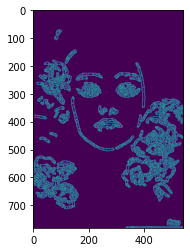

In [ ]:
edges = cv2.Canny(img,100,200)

plt.imshow(img)
plt.imshow(edges)
plt.show()
cv2.imwrite('/content/drive/MyDrive/lady.jpg', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Sobel X , Sobel Y , Laplacian Edge Detector

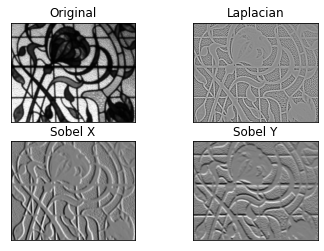

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# loading image
#img0 = cv2.imread('SanFrancisco.jpg',)
image = cv2.imread('/content/drive/MyDrive/windows.jpg',)

# converting to gray scale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# remove noise
img = cv2.GaussianBlur(gray,(3,3),0)

# convolute with proper kernels
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

## Hough Transform

The Hough Transform (HT) is a robust method for finding lines in images that was developed by Paul Hough.

The main idea for the HT is as follows:

For each line L, there is a unique line segment S⊥ perpendicular to L which passes through the origin. This segment can be used to represent a line and is called the Hessian Normal Form or HNF.
S⊥ has a unique distance or radius r from the origin and angle θ from the horizontal axis of the image. This angle and distance define a point in parameter space, sometimes known as Hough space.
In MATLAB, the origin is located at (1,1). Other systems may place the origin at the center of the image, or at (0,0)
The angle θ need only cover 180°. Sometimes positive values from 0° to 180° are used. By default MATLAB uses -90° to 90°
A point in image space has an infinite number of lines that could pass through it, each with a unique distance and angle.
This set of lines corresponds to a sinusoidal function in parameter space. Two points on a line in image space correspond to two sinusoids which cross at a point in parameter space.
That point in parameter space corresponds to that line in image space, and all sinusoids corresponding to points on that line will pass through that point.
To implement this algorithm we quantize the parameter space by using a 2D array of counters, where the array coordinates represent the parameters of the line. This is commonly known as an accumulator array.

The HT method for finding lines in images generally consists of the following three stages:

Accumulate tracings of the parametric sinusoid for each point in a binary edge map into the accumulator array.
Find peak values in the accumulator array
Verify that the peaks found correspond to legitimate lines, rather than noise.

-1

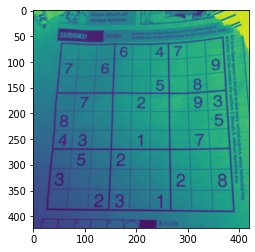

In [ ]:
import cv2
import numpy as np

img = cv2.imread('/content/drive/MyDrive/sudoku.jpg')
# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
cv2.waitKey(0) 

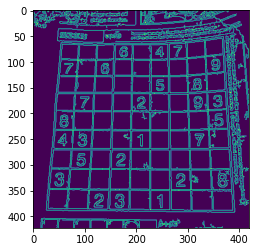

In [ ]:
edges = cv2.Canny(gray,20,100,apertureSize = 3)
plt.imshow(edges)

-1

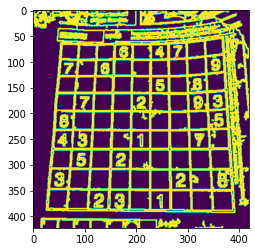

In [ ]:
kernel = np.ones((3,3),np.uint8)
edges = cv2.dilate(edges,kernel,iterations = 1)
plt.imshow(edges)
cv2.imwrite('/content/drive/MyDrive/dilate.jpg', edges)
cv2.waitKey(0)

-1

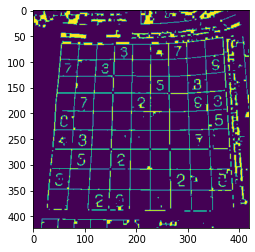

In [ ]:
kernel = np.ones((5,5),np.uint8)
edges = cv2.erode(edges,kernel,iterations = 1)
plt.imshow(edges)
cv2.imwrite('/content/erode.jpg', edges)
cv2.waitKey(0)

number of Hough lines: 30


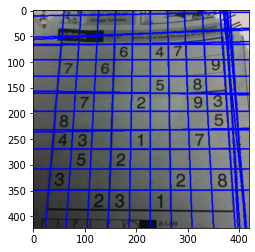

In [ ]:
lines = cv2.HoughLines(edges,1,np.pi/180,150)
print('number of Hough lines:', len(lines))


for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

plt.imshow(img)
cv2.imwrite('/content/hough.jpg',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## **Submitted By : Madhav Shrivastava**

## **Enroll no.   : 19100BTCSBS05597**